In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import ImageQuant2, load_image, nb_setup, raw_data_path

nb_setup()

%matplotlib widget

In [2]:
# Import cytoplasmic profile
cytbg = np.loadtxt("../../data/calibration_cyt.txt")

# Import embryos dataframe
df = pd.read_csv("../../data/par2_nebd_embryos.csv")

# Select 10 random wild type, C56S and L109R embryos
n = 10
df_wt = df[(df.Line == "lp637") * (df.RNAi == "wt")].sample(n)
df_c56s = df[(df.Line == "nwg240") * (df.RNAi == "wt")].sample(n)
df_l109r = df[(df.Line == "nwg338") * (df.RNAi == "wt")].sample(n)
df_l50r = df[(df.Line == "nwg400") * (df.RNAi == "wt")].sample(n)
df_het = df[(df.Line == "nwg325bal") * (df.RNAi == "wt")].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv("../../data/calibration_embryos.csv", index=False)

In [3]:
# Import data
df = pd.read_csv("../../data/calibration_embryos.csv")
if raw_data_path:
    df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)
paths_wt = df[df.Line == "lp637"].Path.to_list()
paths_c56s = df[df.Line == "nwg240"].Path.to_list()
paths_l109r = df[df.Line == "nwg338"].Path.to_list()
paths_l50r = df[df.Line == "nwg400"].Path.to_list()
paths_het = df[df.Line == "nwg325bal"].Path.to_list()
print(len(paths_wt))

imgs_wt = [load_image(p + "/af_corrected.tif") for p in paths_wt]
imgs_c56s = [load_image(p + "/af_corrected.tif") for p in paths_c56s]
imgs_l109r = [load_image(p + "/af_corrected.tif") for p in paths_l109r]
imgs_l50r = [load_image(p + "/af_corrected.tif") for p in paths_l50r]
imgs_het = [load_image(p + "/af_corrected.tif") for p in paths_het]

rois_wt = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_wt]
rois_c56s = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_c56s]
rois_l109r = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_l109r]
rois_l50r = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_l50r]
rois_het = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_het]

10


In [4]:
# Global calibration parameters
kwargs_dict = {"lr": 0.005, "descent_steps": 1000}

### Calibration 1 (WT)

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<11:33,  1.44it/s]

  1%|█▎                                                                                                       | 13/1000 [00:00<00:46, 21.40it/s]

  2%|██▌                                                                                                      | 24/1000 [00:00<00:25, 38.52it/s]

  4%|███▊                                                                                                     | 36/1000 [00:01<00:17, 55.71it/s]

  5%|█████                                                                                                    | 48/1000 [00:01<00:13, 70.19it/s]

  6%|██████▎                                                                                                  | 60/1000 [00:01<00:11, 82.59it/s]

  7%|███████▋                                                                                                 | 73/1000 [00:01<00:09, 93.30it/s]

  8%|████████▊                                                                                               | 85/1000 [00:01<00:09, 100.16it/s]

 10%|██████████                                                                                              | 97/1000 [00:01<00:08, 103.97it/s]

 11%|███████████▏                                                                                           | 109/1000 [00:01<00:08, 106.28it/s]

 12%|████████████▌                                                                                          | 122/1000 [00:01<00:07, 110.94it/s]

 13%|█████████████▊                                                                                         | 134/1000 [00:01<00:07, 109.62it/s]

 15%|███████████████                                                                                        | 146/1000 [00:01<00:07, 108.79it/s]

 16%|████████████████▎                                                                                      | 158/1000 [00:02<00:07, 107.19it/s]

 17%|█████████████████▌                                                                                     | 170/1000 [00:02<00:07, 108.75it/s]

 18%|██████████████████▋                                                                                    | 182/1000 [00:02<00:07, 108.38it/s]

 19%|███████████████████▉                                                                                   | 193/1000 [00:02<00:07, 108.23it/s]

 20%|█████████████████████                                                                                  | 204/1000 [00:02<00:07, 107.96it/s]

 22%|██████████████████████▏                                                                                | 215/1000 [00:02<00:07, 105.26it/s]

 23%|███████████████████████▎                                                                               | 226/1000 [00:02<00:07, 101.62it/s]

 24%|████████████████████████▌                                                                              | 238/1000 [00:02<00:07, 105.75it/s]

 25%|█████████████████████████▊                                                                             | 250/1000 [00:02<00:06, 107.76it/s]

 26%|██████████████████████████▉                                                                            | 262/1000 [00:03<00:06, 109.19it/s]

 27%|████████████████████████████▏                                                                          | 274/1000 [00:03<00:06, 110.69it/s]

 29%|█████████████████████████████▍                                                                         | 286/1000 [00:03<00:06, 111.55it/s]

 30%|██████████████████████████████▋                                                                        | 298/1000 [00:03<00:06, 112.91it/s]

 31%|███████████████████████████████▉                                                                       | 310/1000 [00:03<00:06, 112.87it/s]

 32%|█████████████████████████████████▏                                                                     | 322/1000 [00:03<00:05, 113.76it/s]

 33%|██████████████████████████████████▍                                                                    | 334/1000 [00:03<00:06, 110.55it/s]

 35%|███████████████████████████████████▋                                                                   | 346/1000 [00:03<00:05, 112.54it/s]

 36%|████████████████████████████████████▊                                                                  | 358/1000 [00:03<00:05, 113.26it/s]

 37%|██████████████████████████████████████                                                                 | 370/1000 [00:03<00:05, 114.61it/s]

 38%|███████████████████████████████████████▎                                                               | 382/1000 [00:04<00:05, 115.20it/s]

 39%|████████████████████████████████████████▌                                                              | 394/1000 [00:04<00:05, 114.50it/s]

 41%|█████████████████████████████████████████▊                                                             | 406/1000 [00:04<00:05, 114.34it/s]

 42%|███████████████████████████████████████████                                                            | 418/1000 [00:04<00:05, 115.44it/s]

 43%|████████████████████████████████████████████▎                                                          | 430/1000 [00:04<00:04, 114.95it/s]

 44%|█████████████████████████████████████████████▌                                                         | 442/1000 [00:04<00:04, 113.85it/s]

 45%|██████████████████████████████████████████████▊                                                        | 454/1000 [00:04<00:04, 111.84it/s]

 47%|███████████████████████████████████████████████▉                                                       | 466/1000 [00:04<00:04, 111.80it/s]

 48%|█████████████████████████████████████████████████▏                                                     | 478/1000 [00:04<00:04, 110.30it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 490/1000 [00:05<00:04, 109.43it/s]

 50%|███████████████████████████████████████████████████▋                                                   | 502/1000 [00:05<00:04, 111.26it/s]

 51%|████████████████████████████████████████████████████▉                                                  | 514/1000 [00:05<00:04, 111.86it/s]

 53%|██████████████████████████████████████████████████████▏                                                | 526/1000 [00:05<00:04, 111.90it/s]

 54%|███████████████████████████████████████████████████████▍                                               | 538/1000 [00:05<00:04, 112.62it/s]

 55%|████████████████████████████████████████████████████████▋                                              | 550/1000 [00:05<00:03, 114.02it/s]

 56%|█████████████████████████████████████████████████████████▉                                             | 563/1000 [00:05<00:03, 116.21it/s]

 58%|███████████████████████████████████████████████████████████▎                                           | 576/1000 [00:05<00:03, 117.16it/s]

 59%|████████████████████████████████████████████████████████████▋                                          | 589/1000 [00:05<00:03, 119.22it/s]

 60%|█████████████████████████████████████████████████████████████▉                                         | 601/1000 [00:06<00:03, 117.98it/s]

 61%|███████████████████████████████████████████████████████████████▏                                       | 614/1000 [00:06<00:03, 119.33it/s]

 63%|████████████████████████████████████████████████████████████████▍                                      | 626/1000 [00:06<00:03, 119.04it/s]

 64%|█████████████████████████████████████████████████████████████████▊                                     | 639/1000 [00:06<00:02, 120.51it/s]

 65%|███████████████████████████████████████████████████████████████████▏                                   | 652/1000 [00:06<00:02, 119.80it/s]

 66%|████████████████████████████████████████████████████████████████████▍                                  | 665/1000 [00:06<00:02, 120.68it/s]

 68%|█████████████████████████████████████████████████████████████████████▊                                 | 678/1000 [00:06<00:02, 117.30it/s]

 69%|███████████████████████████████████████████████████████████████████████                                | 690/1000 [00:06<00:02, 115.04it/s]

 70%|████████████████████████████████████████████████████████████████████████▍                              | 703/1000 [00:06<00:02, 117.14it/s]

 72%|█████████████████████████████████████████████████████████████████████████▋                             | 715/1000 [00:06<00:02, 116.63it/s]

 73%|██████████████████████████████████████████████████████████████████████████▉                            | 727/1000 [00:07<00:02, 115.80it/s]

 74%|████████████████████████████████████████████████████████████████████████████▏                          | 740/1000 [00:07<00:02, 117.47it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▍                         | 752/1000 [00:07<00:02, 116.21it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▊                        | 765/1000 [00:07<00:02, 117.10it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▏                      | 778/1000 [00:07<00:01, 119.46it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▎                     | 790/1000 [00:07<00:01, 114.17it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▋                    | 803/1000 [00:07<00:01, 115.77it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████                   | 816/1000 [00:07<00:01, 117.84it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 829/1000 [00:07<00:01, 118.41it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 841/1000 [00:08<00:01, 117.62it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▊               | 853/1000 [00:08<00:01, 118.26it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████              | 865/1000 [00:08<00:01, 117.00it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▎            | 877/1000 [00:08<00:01, 111.94it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▌           | 889/1000 [00:08<00:01, 110.73it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▊          | 901/1000 [00:08<00:00, 111.72it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████         | 913/1000 [00:08<00:00, 112.89it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 925/1000 [00:08<00:00, 114.15it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▌      | 937/1000 [00:08<00:00, 114.98it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▋     | 949/1000 [00:09<00:00, 114.64it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▉    | 961/1000 [00:09<00:00, 113.45it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 973/1000 [00:09<00:00, 113.57it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 985/1000 [00:09<00:00, 114.46it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋| 997/1000 [00:09<00:00, 114.28it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.71it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

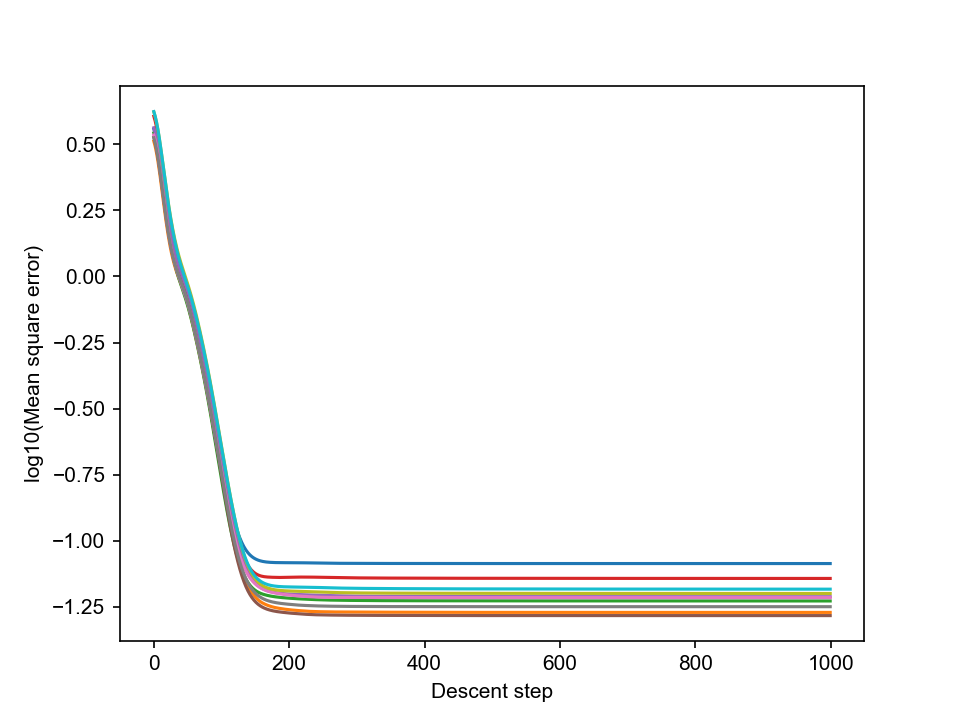

In [5]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### Calibration 2 (C56S)

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<07:53,  2.11it/s]

  1%|█▎                                                                                                       | 12/1000 [00:00<00:36, 26.85it/s]

  2%|██▍                                                                                                      | 23/1000 [00:00<00:20, 47.17it/s]

  4%|███▋                                                                                                     | 35/1000 [00:00<00:14, 65.13it/s]

  5%|████▉                                                                                                    | 47/1000 [00:00<00:12, 79.21it/s]

  6%|██████▏                                                                                                  | 59/1000 [00:00<00:10, 89.42it/s]

  7%|███████▌                                                                                                 | 72/1000 [00:01<00:09, 98.80it/s]

  8%|████████▋                                                                                               | 84/1000 [00:01<00:08, 103.61it/s]

 10%|█████████▉                                                                                              | 96/1000 [00:01<00:08, 107.29it/s]

 11%|███████████                                                                                            | 108/1000 [00:01<00:08, 110.06it/s]

 12%|████████████▎                                                                                          | 120/1000 [00:01<00:07, 112.51it/s]

 13%|█████████████▌                                                                                         | 132/1000 [00:01<00:07, 113.47it/s]

 14%|██████████████▊                                                                                        | 144/1000 [00:01<00:07, 114.78it/s]

 16%|████████████████                                                                                       | 156/1000 [00:01<00:07, 115.47it/s]

 17%|█████████████████▎                                                                                     | 168/1000 [00:01<00:07, 116.25it/s]

 18%|██████████████████▌                                                                                    | 180/1000 [00:02<00:07, 116.91it/s]

 19%|███████████████████▊                                                                                   | 192/1000 [00:02<00:06, 116.90it/s]

 20%|█████████████████████                                                                                  | 204/1000 [00:02<00:07, 108.12it/s]

 22%|██████████████████████▏                                                                                | 216/1000 [00:02<00:07, 110.32it/s]

 23%|███████████████████████▍                                                                               | 228/1000 [00:02<00:06, 111.32it/s]

 24%|████████████████████████▋                                                                              | 240/1000 [00:02<00:06, 113.70it/s]

 25%|█████████████████████████▉                                                                             | 252/1000 [00:02<00:06, 113.40it/s]

 26%|███████████████████████████▏                                                                           | 264/1000 [00:02<00:06, 112.90it/s]

 28%|████████████████████████████▍                                                                          | 276/1000 [00:02<00:06, 114.68it/s]

 29%|█████████████████████████████▋                                                                         | 288/1000 [00:02<00:06, 115.93it/s]

 30%|███████████████████████████████                                                                        | 301/1000 [00:03<00:05, 117.24it/s]

 31%|████████████████████████████████▏                                                                      | 313/1000 [00:03<00:05, 117.96it/s]

 32%|█████████████████████████████████▍                                                                     | 325/1000 [00:03<00:05, 117.81it/s]

 34%|██████████████████████████████████▋                                                                    | 337/1000 [00:03<00:05, 116.95it/s]

 35%|███████████████████████████████████▉                                                                   | 349/1000 [00:03<00:05, 116.48it/s]

 36%|█████████████████████████████████████▏                                                                 | 361/1000 [00:03<00:05, 117.28it/s]

 37%|██████████████████████████████████████▍                                                                | 373/1000 [00:03<00:05, 117.14it/s]

 38%|███████████████████████████████████████▋                                                               | 385/1000 [00:03<00:05, 116.44it/s]

 40%|████████████████████████████████████████▉                                                              | 398/1000 [00:03<00:05, 117.81it/s]

 41%|██████████████████████████████████████████▏                                                            | 410/1000 [00:04<00:05, 116.54it/s]

 42%|███████████████████████████████████████████▍                                                           | 422/1000 [00:04<00:04, 117.45it/s]

 43%|████████████████████████████████████████████▋                                                          | 434/1000 [00:04<00:04, 116.23it/s]

 45%|██████████████████████████████████████████████▍                                                         | 446/1000 [00:04<00:05, 99.83it/s]

 46%|███████████████████████████████████████████████▌                                                        | 457/1000 [00:04<00:05, 98.84it/s]

 47%|████████████████████████████████████████████████▏                                                      | 468/1000 [00:04<00:05, 100.75it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 479/1000 [00:04<00:05, 102.21it/s]

 49%|██████████████████████████████████████████████████▌                                                    | 491/1000 [00:04<00:04, 107.10it/s]

 50%|███████████████████████████████████████████████████▉                                                   | 504/1000 [00:04<00:04, 111.73it/s]

 52%|█████████████████████████████████████████████████████▏                                                 | 516/1000 [00:05<00:04, 113.55it/s]

 53%|██████████████████████████████████████████████████████▍                                                | 528/1000 [00:05<00:04, 114.63it/s]

 54%|███████████████████████████████████████████████████████▌                                               | 540/1000 [00:05<00:04, 115.00it/s]

 55%|████████████████████████████████████████████████████████▊                                              | 552/1000 [00:05<00:03, 116.06it/s]

 56%|██████████████████████████████████████████████████████████▏                                            | 565/1000 [00:05<00:03, 117.15it/s]

 58%|███████████████████████████████████████████████████████████▌                                           | 578/1000 [00:05<00:03, 118.36it/s]

 59%|████████████████████████████████████████████████████████████▊                                          | 590/1000 [00:05<00:03, 116.69it/s]

 60%|██████████████████████████████████████████████████████████████                                         | 602/1000 [00:05<00:03, 116.46it/s]

 61%|███████████████████████████████████████████████████████████████▏                                       | 614/1000 [00:05<00:03, 116.57it/s]

 63%|████████████████████████████████████████████████████████████████▍                                      | 626/1000 [00:05<00:03, 116.44it/s]

 64%|█████████████████████████████████████████████████████████████████▊                                     | 639/1000 [00:06<00:03, 118.53it/s]

 65%|███████████████████████████████████████████████████████████████████                                    | 651/1000 [00:06<00:03, 115.29it/s]

 66%|████████████████████████████████████████████████████████████████████▎                                  | 663/1000 [00:06<00:03, 110.91it/s]

 68%|█████████████████████████████████████████████████████████████████████▌                                 | 675/1000 [00:06<00:02, 111.13it/s]

 69%|██████████████████████████████████████████████████████████████████████▊                                | 687/1000 [00:06<00:02, 112.08it/s]

 70%|███████████████████████████████████████████████████████████████████████▉                               | 699/1000 [00:06<00:02, 109.88it/s]

 71%|█████████████████████████████████████████████████████████████████████████▏                             | 711/1000 [00:06<00:02, 112.15it/s]

 72%|██████████████████████████████████████████████████████████████████████████▍                            | 723/1000 [00:06<00:02, 109.91it/s]

 74%|███████████████████████████████████████████████████████████████████████████▋                           | 735/1000 [00:06<00:02, 110.82it/s]

 75%|████████████████████████████████████████████████████████████████████████████▉                          | 747/1000 [00:07<00:02, 111.94it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▎                        | 760/1000 [00:07<00:02, 114.28it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▌                       | 772/1000 [00:07<00:02, 110.37it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▊                      | 784/1000 [00:07<00:01, 111.46it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████                     | 797/1000 [00:07<00:01, 114.57it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▍                   | 810/1000 [00:07<00:01, 116.16it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▊                  | 823/1000 [00:07<00:01, 117.69it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████                 | 836/1000 [00:07<00:01, 118.35it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▎               | 848/1000 [00:07<00:01, 115.39it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▌              | 860/1000 [00:08<00:01, 114.73it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▉             | 873/1000 [00:08<00:01, 116.91it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████▏           | 885/1000 [00:08<00:00, 115.33it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▍          | 897/1000 [00:08<00:00, 114.92it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████▋         | 909/1000 [00:08<00:00, 115.70it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▊        | 921/1000 [00:08<00:00, 116.67it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████       | 933/1000 [00:08<00:00, 114.35it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▎     | 945/1000 [00:08<00:00, 115.55it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 957/1000 [00:08<00:00, 115.11it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▊   | 969/1000 [00:08<00:00, 115.84it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████  | 981/1000 [00:09<00:00, 115.26it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍| 994/1000 [00:09<00:00, 116.81it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.36it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

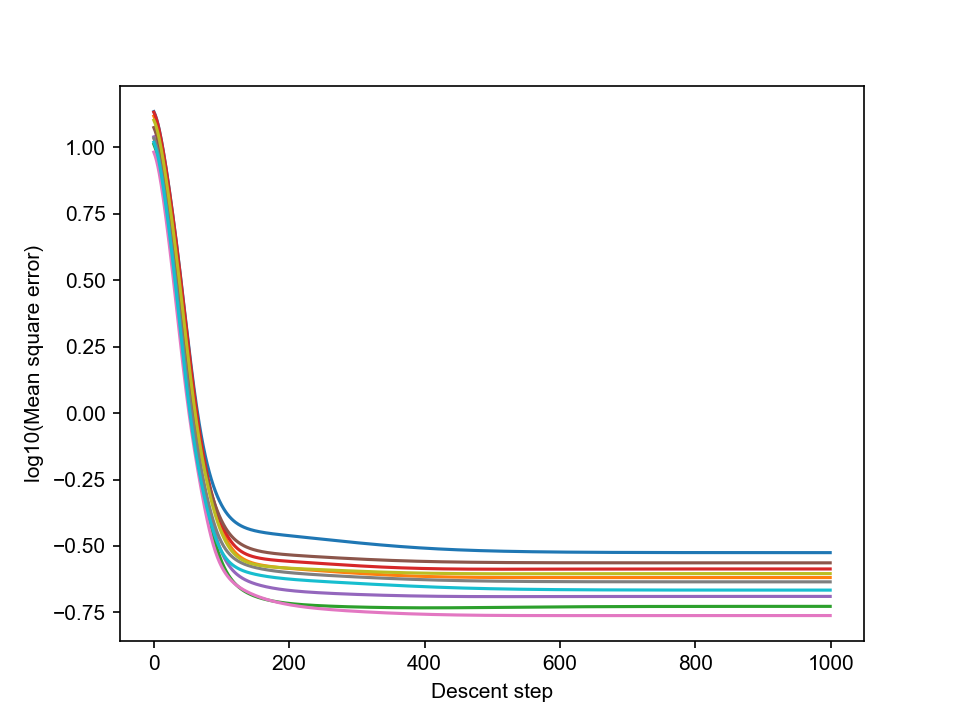

In [6]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### Calibration 3 (L109R)

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<07:25,  2.24it/s]

  1%|█▎                                                                                                       | 13/1000 [00:00<00:32, 30.44it/s]

  3%|██▋                                                                                                      | 26/1000 [00:00<00:17, 55.03it/s]

  4%|███▊                                                                                                     | 36/1000 [00:00<00:15, 63.32it/s]

  5%|█████                                                                                                    | 48/1000 [00:00<00:12, 77.90it/s]

  6%|██████▎                                                                                                  | 60/1000 [00:00<00:10, 88.71it/s]

  7%|███████▌                                                                                                 | 72/1000 [00:01<00:09, 96.89it/s]

  8%|████████▊                                                                                               | 85/1000 [00:01<00:08, 105.83it/s]

 10%|██████████                                                                                              | 97/1000 [00:01<00:08, 108.67it/s]

 11%|███████████▎                                                                                           | 110/1000 [00:01<00:07, 113.64it/s]

 12%|████████████▌                                                                                          | 122/1000 [00:01<00:07, 114.09it/s]

 14%|█████████████▉                                                                                         | 135/1000 [00:01<00:07, 115.96it/s]

 15%|███████████████▏                                                                                       | 147/1000 [00:01<00:07, 115.89it/s]

 16%|████████████████▍                                                                                      | 159/1000 [00:01<00:07, 114.89it/s]

 17%|█████████████████▌                                                                                     | 171/1000 [00:01<00:07, 115.91it/s]

 18%|██████████████████▉                                                                                    | 184/1000 [00:02<00:06, 118.63it/s]

 20%|████████████████████▏                                                                                  | 196/1000 [00:02<00:06, 118.05it/s]

 21%|█████████████████████▍                                                                                 | 208/1000 [00:02<00:06, 118.44it/s]

 22%|██████████████████████▊                                                                                | 221/1000 [00:02<00:06, 119.93it/s]

 23%|████████████████████████                                                                               | 234/1000 [00:02<00:06, 120.53it/s]

 25%|█████████████████████████▍                                                                             | 247/1000 [00:02<00:06, 118.73it/s]

 26%|██████████████████████████▊                                                                            | 260/1000 [00:02<00:06, 119.41it/s]

 27%|████████████████████████████                                                                           | 273/1000 [00:02<00:06, 120.14it/s]

 29%|█████████████████████████████▍                                                                         | 286/1000 [00:02<00:05, 120.88it/s]

 30%|██████████████████████████████▊                                                                        | 299/1000 [00:02<00:05, 121.36it/s]

 31%|████████████████████████████████▏                                                                      | 312/1000 [00:03<00:05, 121.66it/s]

 32%|█████████████████████████████████▍                                                                     | 325/1000 [00:03<00:05, 122.13it/s]

 34%|██████████████████████████████████▊                                                                    | 338/1000 [00:03<00:05, 122.83it/s]

 35%|████████████████████████████████████▏                                                                  | 351/1000 [00:03<00:05, 122.20it/s]

 36%|█████████████████████████████████████▍                                                                 | 364/1000 [00:03<00:05, 120.14it/s]

 38%|██████████████████████████████████████▊                                                                | 377/1000 [00:03<00:05, 118.97it/s]

 39%|████████████████████████████████████████                                                               | 389/1000 [00:03<00:05, 119.03it/s]

 40%|█████████████████████████████████████████▎                                                             | 401/1000 [00:03<00:05, 117.18it/s]

 41%|██████████████████████████████████████████▌                                                            | 413/1000 [00:03<00:05, 116.45it/s]

 42%|███████████████████████████████████████████▊                                                           | 425/1000 [00:04<00:04, 116.92it/s]

 44%|█████████████████████████████████████████████                                                          | 437/1000 [00:04<00:04, 116.70it/s]

 45%|██████████████████████████████████████████████▎                                                        | 450/1000 [00:04<00:04, 118.08it/s]

 46%|███████████████████████████████████████████████▋                                                       | 463/1000 [00:04<00:04, 119.18it/s]

 48%|████████████████████████████████████████████████▉                                                      | 475/1000 [00:04<00:04, 119.12it/s]

 49%|██████████████████████████████████████████████████▏                                                    | 487/1000 [00:04<00:04, 118.62it/s]

 50%|███████████████████████████████████████████████████▍                                                   | 499/1000 [00:04<00:04, 117.21it/s]

 51%|████████████████████████████████████████████████████▋                                                  | 511/1000 [00:04<00:04, 114.34it/s]

 52%|█████████████████████████████████████████████████████▊                                                 | 523/1000 [00:04<00:04, 114.63it/s]

 54%|███████████████████████████████████████████████████████                                                | 535/1000 [00:04<00:04, 114.89it/s]

 55%|████████████████████████████████████████████████████████▎                                              | 547/1000 [00:05<00:04, 108.91it/s]

 56%|█████████████████████████████████████████████████████████▍                                             | 558/1000 [00:05<00:04, 109.18it/s]

 57%|██████████████████████████████████████████████████████████▋                                            | 570/1000 [00:05<00:03, 111.01it/s]

 58%|███████████████████████████████████████████████████████████▉                                           | 582/1000 [00:05<00:03, 113.49it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 595/1000 [00:05<00:03, 115.52it/s]

 61%|██████████████████████████████████████████████████████████████▌                                        | 607/1000 [00:05<00:03, 115.81it/s]

 62%|███████████████████████████████████████████████████████████████▊                                       | 620/1000 [00:05<00:03, 117.38it/s]

 63%|█████████████████████████████████████████████████████████████████▏                                     | 633/1000 [00:05<00:03, 118.78it/s]

 64%|██████████████████████████████████████████████████████████████████▍                                    | 645/1000 [00:05<00:03, 118.17it/s]

 66%|███████████████████████████████████████████████████████████████████▋                                   | 657/1000 [00:06<00:02, 118.33it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 670/1000 [00:06<00:02, 119.33it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 682/1000 [00:06<00:02, 119.43it/s]

 70%|███████████████████████████████████████████████████████████████████████▌                               | 695/1000 [00:06<00:02, 119.90it/s]

 71%|████████████████████████████████████████████████████████████████████████▊                              | 707/1000 [00:06<00:02, 118.73it/s]

 72%|██████████████████████████████████████████████████████████████████████████                             | 719/1000 [00:06<00:02, 118.67it/s]

 73%|███████████████████████████████████████████████████████████████████████████▎                           | 731/1000 [00:06<00:02, 116.78it/s]

 74%|████████████████████████████████████████████████████████████████████████████▌                          | 743/1000 [00:06<00:02, 115.68it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 755/1000 [00:06<00:02, 112.92it/s]

 77%|███████████████████████████████████████████████████████████████████████████████                        | 767/1000 [00:06<00:02, 113.58it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▏                      | 779/1000 [00:07<00:01, 115.40it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▍                     | 791/1000 [00:07<00:01, 116.70it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▋                    | 803/1000 [00:07<00:01, 117.17it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████▉                   | 815/1000 [00:07<00:01, 114.75it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▏                 | 827/1000 [00:07<00:01, 111.74it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▍                | 839/1000 [00:07<00:01, 112.18it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 851/1000 [00:07<00:01, 112.07it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▉              | 863/1000 [00:07<00:01, 113.03it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▏            | 875/1000 [00:07<00:01, 112.11it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▍           | 888/1000 [00:08<00:00, 114.58it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▊          | 901/1000 [00:08<00:00, 116.99it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 914/1000 [00:08<00:00, 117.73it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▍       | 926/1000 [00:08<00:00, 116.93it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▌      | 938/1000 [00:08<00:00, 117.47it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▊     | 950/1000 [00:08<00:00, 117.72it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████    | 962/1000 [00:08<00:00, 116.98it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 974/1000 [00:08<00:00, 110.01it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 986/1000 [00:08<00:00, 109.17it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉| 999/1000 [00:09<00:00, 112.38it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.75it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

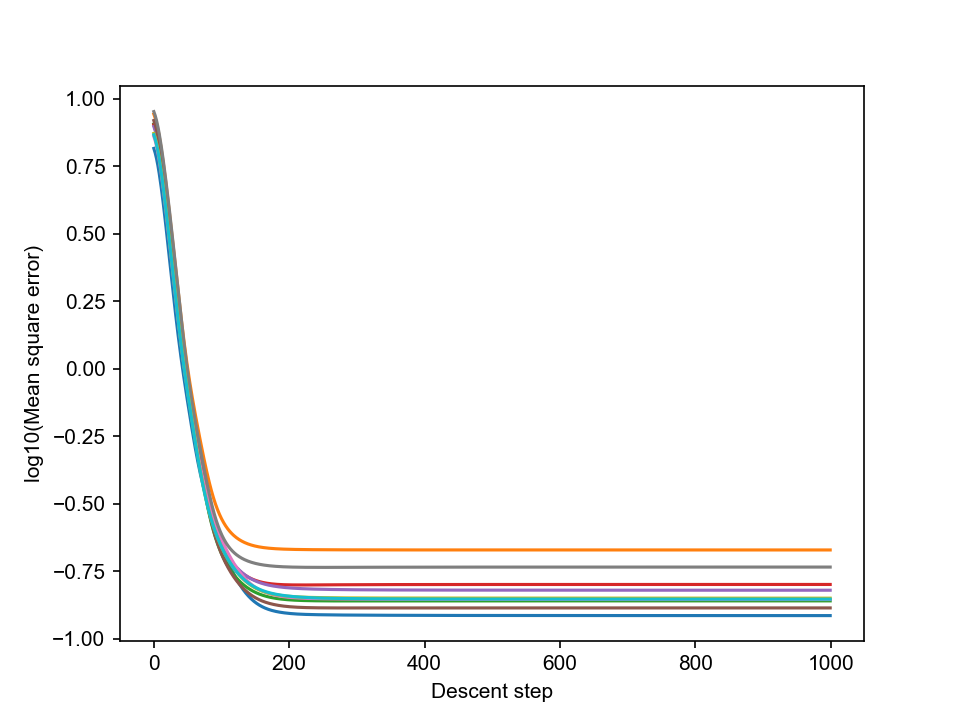

In [7]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### Calibration 4 (L50R)

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:37,  1.93it/s]

  1%|█▏                                                                                                       | 11/1000 [00:00<00:43, 22.79it/s]

  2%|██▎                                                                                                      | 22/1000 [00:00<00:22, 43.08it/s]

  3%|███▍                                                                                                     | 33/1000 [00:00<00:16, 58.21it/s]

  4%|████▌                                                                                                    | 43/1000 [00:00<00:14, 67.08it/s]

  5%|█████▍                                                                                                   | 52/1000 [00:01<00:13, 69.96it/s]

  6%|██████▍                                                                                                  | 61/1000 [00:01<00:12, 74.29it/s]

  7%|███████▎                                                                                                 | 70/1000 [00:01<00:12, 76.16it/s]

  8%|████████▎                                                                                                | 79/1000 [00:01<00:12, 76.58it/s]

  9%|█████████▍                                                                                               | 90/1000 [00:01<00:10, 84.62it/s]

 10%|██████████▌                                                                                             | 102/1000 [00:01<00:09, 93.87it/s]

 11%|███████████▋                                                                                           | 114/1000 [00:01<00:08, 100.79it/s]

 13%|████████████▉                                                                                          | 126/1000 [00:01<00:08, 103.85it/s]

 14%|██████████████▏                                                                                        | 138/1000 [00:01<00:08, 106.92it/s]

 15%|███████████████▍                                                                                       | 150/1000 [00:02<00:07, 110.52it/s]

 16%|████████████████▋                                                                                      | 162/1000 [00:02<00:07, 112.17it/s]

 17%|█████████████████▉                                                                                     | 174/1000 [00:02<00:07, 110.98it/s]

 19%|███████████████████▏                                                                                   | 186/1000 [00:02<00:07, 113.24it/s]

 20%|████████████████████▍                                                                                  | 199/1000 [00:02<00:06, 116.12it/s]

 21%|█████████████████████▊                                                                                 | 212/1000 [00:02<00:06, 117.98it/s]

 22%|███████████████████████                                                                                | 224/1000 [00:02<00:06, 117.79it/s]

 24%|████████████████████████▍                                                                              | 237/1000 [00:02<00:06, 118.88it/s]

 25%|█████████████████████████▋                                                                             | 249/1000 [00:02<00:06, 114.20it/s]

 26%|██████████████████████████▉                                                                            | 261/1000 [00:02<00:06, 112.39it/s]

 27%|████████████████████████████                                                                           | 273/1000 [00:03<00:06, 113.61it/s]

 28%|█████████████████████████████▎                                                                         | 285/1000 [00:03<00:06, 113.25it/s]

 30%|██████████████████████████████▌                                                                        | 297/1000 [00:03<00:06, 113.64it/s]

 31%|███████████████████████████████▊                                                                       | 309/1000 [00:03<00:06, 113.91it/s]

 32%|█████████████████████████████████                                                                      | 321/1000 [00:03<00:05, 115.30it/s]

 33%|██████████████████████████████████▎                                                                    | 333/1000 [00:03<00:05, 113.01it/s]

 34%|███████████████████████████████████▌                                                                   | 345/1000 [00:03<00:05, 113.21it/s]

 36%|████████████████████████████████████▊                                                                  | 357/1000 [00:03<00:05, 113.86it/s]

 37%|██████████████████████████████████████                                                                 | 369/1000 [00:03<00:05, 115.58it/s]

 38%|███████████████████████████████████████▎                                                               | 382/1000 [00:04<00:05, 117.12it/s]

 39%|████████████████████████████████████████▌                                                              | 394/1000 [00:04<00:05, 116.69it/s]

 41%|█████████████████████████████████████████▊                                                             | 406/1000 [00:04<00:05, 115.85it/s]

 42%|███████████████████████████████████████████                                                            | 418/1000 [00:04<00:04, 116.55it/s]

 43%|████████████████████████████████████████████▎                                                          | 430/1000 [00:04<00:04, 116.76it/s]

 44%|█████████████████████████████████████████████▋                                                         | 443/1000 [00:04<00:04, 117.73it/s]

 46%|██████████████████████████████████████████████▊                                                        | 455/1000 [00:04<00:04, 115.54it/s]

 47%|████████████████████████████████████████████████                                                       | 467/1000 [00:04<00:04, 113.73it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 479/1000 [00:04<00:04, 114.04it/s]

 49%|██████████████████████████████████████████████████▌                                                    | 491/1000 [00:04<00:04, 113.51it/s]

 50%|███████████████████████████████████████████████████▊                                                   | 503/1000 [00:05<00:04, 114.29it/s]

 52%|█████████████████████████████████████████████████████                                                  | 515/1000 [00:05<00:04, 113.27it/s]

 53%|██████████████████████████████████████████████████████▎                                                | 527/1000 [00:05<00:04, 113.68it/s]

 54%|███████████████████████████████████████████████████████▌                                               | 539/1000 [00:05<00:04, 107.17it/s]

 55%|████████████████████████████████████████████████████████▋                                              | 550/1000 [00:05<00:04, 100.15it/s]

 56%|██████████████████████████████████████████████████████████▎                                             | 561/1000 [00:05<00:04, 95.63it/s]

 57%|███████████████████████████████████████████████████████████▍                                            | 572/1000 [00:05<00:04, 98.45it/s]

 58%|████████████████████████████████████████████████████████████▏                                          | 584/1000 [00:05<00:04, 103.52it/s]

 60%|█████████████████████████████████████████████████████████████▍                                         | 596/1000 [00:05<00:03, 105.50it/s]

 61%|██████████████████████████████████████████████████████████████▌                                        | 607/1000 [00:06<00:03, 104.97it/s]

 62%|███████████████████████████████████████████████████████████████▋                                       | 618/1000 [00:06<00:03, 104.77it/s]

 63%|████████████████████████████████████████████████████████████████▊                                      | 629/1000 [00:06<00:03, 104.22it/s]

 64%|█████████████████████████████████████████████████████████████████▉                                     | 640/1000 [00:06<00:03, 104.72it/s]

 65%|███████████████████████████████████████████████████████████████████                                    | 651/1000 [00:06<00:03, 105.29it/s]

 66%|████████████████████████████████████████████████████████████████████▏                                  | 662/1000 [00:06<00:03, 104.70it/s]

 67%|█████████████████████████████████████████████████████████████████████▎                                 | 673/1000 [00:06<00:03, 105.65it/s]

 68%|██████████████████████████████████████████████████████████████████████▍                                | 684/1000 [00:06<00:02, 105.68it/s]

 70%|███████████████████████████████████████████████████████████████████████▌                               | 695/1000 [00:06<00:02, 105.47it/s]

 71%|████████████████████████████████████████████████████████████████████████▋                              | 706/1000 [00:07<00:02, 105.61it/s]

 72%|█████████████████████████████████████████████████████████████████████████▊                             | 717/1000 [00:07<00:02, 106.47it/s]

 73%|███████████████████████████████████████████████████████████████████████████▋                            | 728/1000 [00:07<00:02, 99.18it/s]

 74%|████████████████████████████████████████████████████████████████████████████                           | 739/1000 [00:07<00:02, 102.09it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▎                         | 751/1000 [00:07<00:02, 106.02it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▌                        | 763/1000 [00:07<00:02, 107.85it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▊                       | 775/1000 [00:07<00:02, 109.01it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 787/1000 [00:07<00:01, 109.18it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 798/1000 [00:07<00:02, 100.57it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 809/1000 [00:08<00:01, 100.08it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▌                  | 821/1000 [00:08<00:01, 103.99it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▉                 | 834/1000 [00:08<00:01, 108.56it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████                | 845/1000 [00:08<00:01, 108.50it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▏              | 856/1000 [00:08<00:01, 106.41it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▎             | 867/1000 [00:08<00:01, 105.07it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▍            | 878/1000 [00:08<00:01, 105.52it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▌           | 889/1000 [00:08<00:01, 105.34it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▋          | 900/1000 [00:08<00:00, 105.37it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████▊         | 911/1000 [00:08<00:00, 105.42it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▉        | 922/1000 [00:09<00:00, 102.22it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████       | 933/1000 [00:09<00:00, 100.38it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▏     | 944/1000 [00:09<00:00, 102.31it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▎    | 955/1000 [00:09<00:00, 101.06it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 966/1000 [00:09<00:00, 99.17it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 976/1000 [00:09<00:00, 90.01it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 986/1000 [00:09<00:00, 91.35it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌| 996/1000 [00:09<00:00, 91.92it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.63it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

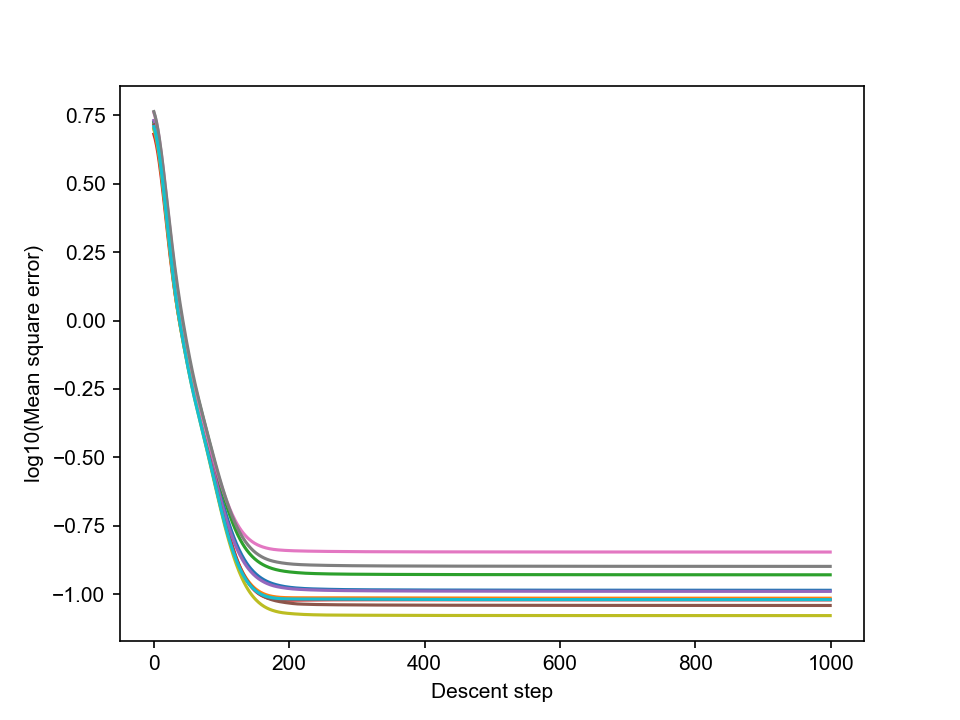

In [8]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Calibration 5 (WT single copy)

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:18,  2.00it/s]

  1%|█▎                                                                                                       | 12/1000 [00:00<00:38, 25.55it/s]

  2%|██▍                                                                                                      | 23/1000 [00:00<00:21, 44.93it/s]

  3%|███▎                                                                                                     | 32/1000 [00:00<00:17, 54.22it/s]

  4%|████▏                                                                                                    | 40/1000 [00:00<00:16, 58.87it/s]

  5%|█████                                                                                                    | 48/1000 [00:01<00:15, 62.14it/s]

  6%|█████▉                                                                                                   | 56/1000 [00:01<00:14, 62.96it/s]

  6%|██████▋                                                                                                  | 64/1000 [00:01<00:16, 58.07it/s]

  7%|███████▍                                                                                                 | 71/1000 [00:01<00:15, 60.62it/s]

  8%|████████▎                                                                                                | 79/1000 [00:01<00:14, 65.45it/s]

  9%|█████████▍                                                                                               | 90/1000 [00:01<00:11, 76.16it/s]

 10%|██████████▌                                                                                             | 102/1000 [00:01<00:10, 87.16it/s]

 12%|███████████▉                                                                                            | 115/1000 [00:01<00:09, 97.18it/s]

 13%|█████████████▏                                                                                         | 128/1000 [00:01<00:08, 104.25it/s]

 14%|██████████████▌                                                                                        | 141/1000 [00:02<00:07, 110.24it/s]

 15%|███████████████▊                                                                                       | 154/1000 [00:02<00:07, 114.28it/s]

 17%|█████████████████                                                                                      | 166/1000 [00:02<00:08, 102.76it/s]

 18%|██████████████████▍                                                                                     | 177/1000 [00:02<00:08, 92.10it/s]

 19%|███████████████████▍                                                                                    | 187/1000 [00:02<00:08, 93.62it/s]

 20%|████████████████████▋                                                                                   | 199/1000 [00:02<00:08, 97.04it/s]

 21%|█████████████████████▋                                                                                  | 209/1000 [00:02<00:08, 90.63it/s]

 22%|██████████████████████▊                                                                                 | 219/1000 [00:02<00:09, 83.12it/s]

 23%|███████████████████████▋                                                                                | 228/1000 [00:03<00:10, 75.67it/s]

 24%|████████████████████████▌                                                                               | 236/1000 [00:03<00:11, 68.16it/s]

 25%|█████████████████████████▋                                                                              | 247/1000 [00:03<00:09, 76.42it/s]

 26%|██████████████████████████▉                                                                             | 259/1000 [00:03<00:08, 86.36it/s]

 27%|████████████████████████████                                                                            | 270/1000 [00:03<00:08, 90.41it/s]

 28%|█████████████████████████████▏                                                                          | 281/1000 [00:03<00:07, 94.75it/s]

 29%|██████████████████████████████▎                                                                         | 292/1000 [00:03<00:07, 98.37it/s]

 30%|███████████████████████████████▏                                                                       | 303/1000 [00:03<00:06, 101.09it/s]

 32%|████████████████████████████████▌                                                                      | 316/1000 [00:04<00:06, 107.07it/s]

 33%|█████████████████████████████████▊                                                                     | 328/1000 [00:04<00:06, 108.62it/s]

 34%|███████████████████████████████████                                                                    | 341/1000 [00:04<00:05, 113.07it/s]

 35%|████████████████████████████████████▎                                                                  | 353/1000 [00:04<00:05, 114.05it/s]

 36%|█████████████████████████████████████▌                                                                 | 365/1000 [00:04<00:05, 114.98it/s]

 38%|██████████████████████████████████████▊                                                                | 377/1000 [00:04<00:05, 115.20it/s]

 39%|████████████████████████████████████████                                                               | 389/1000 [00:04<00:05, 115.55it/s]

 40%|█████████████████████████████████████████▎                                                             | 401/1000 [00:04<00:05, 115.52it/s]

 41%|██████████████████████████████████████████▌                                                            | 413/1000 [00:04<00:05, 107.51it/s]

 42%|███████████████████████████████████████████▊                                                           | 425/1000 [00:04<00:05, 110.64it/s]

 44%|█████████████████████████████████████████████                                                          | 438/1000 [00:05<00:04, 113.70it/s]

 45%|██████████████████████████████████████████████▎                                                        | 450/1000 [00:05<00:04, 114.24it/s]

 46%|███████████████████████████████████████████████▌                                                       | 462/1000 [00:05<00:04, 115.85it/s]

 47%|████████████████████████████████████████████████▊                                                      | 474/1000 [00:05<00:04, 116.45it/s]

 49%|██████████████████████████████████████████████████                                                     | 486/1000 [00:05<00:04, 117.29it/s]

 50%|███████████████████████████████████████████████████▍                                                   | 499/1000 [00:05<00:04, 118.32it/s]

 51%|████████████████████████████████████████████████████▋                                                  | 511/1000 [00:05<00:04, 117.83it/s]

 52%|█████████████████████████████████████████████████████▊                                                 | 523/1000 [00:05<00:04, 116.63it/s]

 54%|███████████████████████████████████████████████████████                                                | 535/1000 [00:05<00:03, 116.57it/s]

 55%|████████████████████████████████████████████████████████▎                                              | 547/1000 [00:05<00:03, 117.51it/s]

 56%|█████████████████████████████████████████████████████████▌                                             | 559/1000 [00:06<00:03, 117.70it/s]

 57%|██████████████████████████████████████████████████████████▊                                            | 571/1000 [00:06<00:03, 118.04it/s]

 58%|████████████████████████████████████████████████████████████                                           | 583/1000 [00:06<00:03, 117.17it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 595/1000 [00:06<00:03, 117.06it/s]

 61%|██████████████████████████████████████████████████████████████▌                                        | 608/1000 [00:06<00:03, 118.53it/s]

 62%|███████████████████████████████████████████████████████████████▊                                       | 620/1000 [00:06<00:03, 117.34it/s]

 63%|█████████████████████████████████████████████████████████████████▏                                     | 633/1000 [00:06<00:03, 118.47it/s]

 65%|██████████████████████████████████████████████████████████████████▌                                    | 646/1000 [00:06<00:02, 119.19it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 659/1000 [00:06<00:02, 120.87it/s]

 67%|█████████████████████████████████████████████████████████████████████▏                                 | 672/1000 [00:07<00:02, 121.72it/s]

 68%|██████████████████████████████████████████████████████████████████████▌                                | 685/1000 [00:07<00:02, 120.83it/s]

 70%|███████████████████████████████████████████████████████████████████████▉                               | 698/1000 [00:07<00:02, 119.79it/s]

 71%|█████████████████████████████████████████████████████████████████████████▏                             | 710/1000 [00:07<00:02, 118.78it/s]

 72%|██████████████████████████████████████████████████████████████████████████▎                            | 722/1000 [00:07<00:02, 116.34it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 734/1000 [00:07<00:02, 115.48it/s]

 75%|████████████████████████████████████████████████████████████████████████████▊                          | 746/1000 [00:07<00:02, 114.18it/s]

 76%|██████████████████████████████████████████████████████████████████████████████                         | 758/1000 [00:07<00:02, 114.71it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▎                       | 770/1000 [00:07<00:01, 115.99it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▋                      | 783/1000 [00:07<00:01, 118.07it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████▉                     | 796/1000 [00:08<00:01, 119.49it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▏                   | 808/1000 [00:08<00:01, 119.45it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▍                  | 820/1000 [00:08<00:01, 118.93it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▋                 | 832/1000 [00:08<00:01, 118.52it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▉                | 844/1000 [00:08<00:01, 118.52it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▎              | 857/1000 [00:08<00:01, 119.89it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▌             | 869/1000 [00:08<00:01, 119.54it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▋            | 881/1000 [00:08<00:00, 119.34it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 894/1000 [00:08<00:00, 119.90it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████▍         | 907/1000 [00:09<00:00, 120.59it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▊        | 920/1000 [00:09<00:00, 120.93it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████       | 933/1000 [00:09<00:00, 118.05it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▎     | 945/1000 [00:09<00:00, 117.49it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 957/1000 [00:09<00:00, 117.93it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▊   | 969/1000 [00:09<00:00, 117.43it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████  | 981/1000 [00:09<00:00, 117.95it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎| 993/1000 [00:09<00:00, 115.89it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.62it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

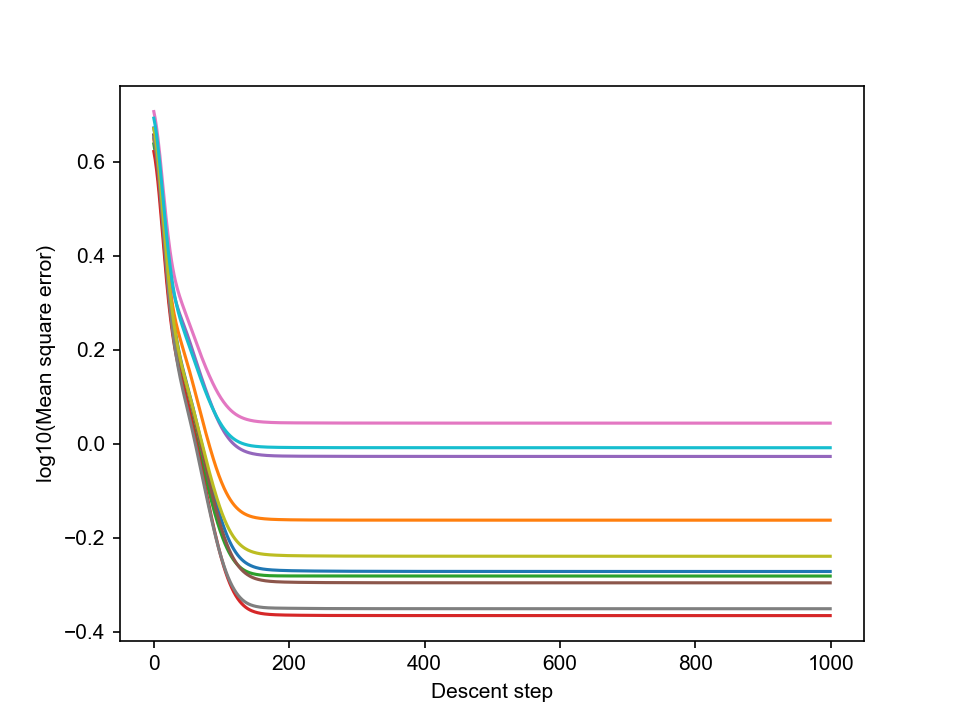

In [9]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Calibration 6 (Full dataset)

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:51,  1.88it/s]

  1%|▋                                                                                                         | 6/1000 [00:00<01:25, 11.67it/s]

  1%|█▏                                                                                                       | 11/1000 [00:00<00:49, 20.02it/s]

  2%|█▋                                                                                                       | 16/1000 [00:00<00:36, 26.83it/s]

  2%|██▏                                                                                                      | 21/1000 [00:00<00:30, 31.91it/s]

  3%|██▋                                                                                                      | 26/1000 [00:01<00:27, 35.74it/s]

  3%|███▎                                                                                                     | 31/1000 [00:01<00:25, 38.44it/s]

  4%|███▊                                                                                                     | 36/1000 [00:01<00:23, 40.78it/s]

  4%|████▎                                                                                                    | 41/1000 [00:01<00:22, 42.52it/s]

  5%|████▊                                                                                                    | 46/1000 [00:01<00:21, 44.04it/s]

  5%|█████▎                                                                                                   | 51/1000 [00:01<00:21, 45.01it/s]

  6%|█████▉                                                                                                   | 56/1000 [00:01<00:20, 45.43it/s]

  6%|██████▍                                                                                                  | 61/1000 [00:01<00:20, 45.39it/s]

  7%|██████▉                                                                                                  | 66/1000 [00:01<00:21, 44.47it/s]

  7%|███████▍                                                                                                 | 71/1000 [00:02<00:21, 43.62it/s]

  8%|███████▉                                                                                                 | 76/1000 [00:02<00:21, 43.44it/s]

  8%|████████▌                                                                                                | 81/1000 [00:02<00:22, 41.00it/s]

  9%|█████████                                                                                                | 86/1000 [00:02<00:22, 41.17it/s]

  9%|█████████▌                                                                                               | 91/1000 [00:02<00:21, 41.39it/s]

 10%|██████████                                                                                               | 96/1000 [00:02<00:21, 41.61it/s]

 10%|██████████▌                                                                                             | 101/1000 [00:02<00:21, 41.82it/s]

 11%|███████████                                                                                             | 106/1000 [00:02<00:21, 42.07it/s]

 11%|███████████▌                                                                                            | 111/1000 [00:03<00:21, 42.16it/s]

 12%|████████████                                                                                            | 116/1000 [00:03<00:20, 42.60it/s]

 12%|████████████▌                                                                                           | 121/1000 [00:03<00:21, 41.81it/s]

 13%|█████████████                                                                                           | 126/1000 [00:03<00:20, 42.15it/s]

 13%|█████████████▌                                                                                          | 131/1000 [00:03<00:20, 42.31it/s]

 14%|██████████████▏                                                                                         | 136/1000 [00:03<00:23, 37.56it/s]

 14%|██████████████▋                                                                                         | 141/1000 [00:03<00:22, 38.84it/s]

 15%|███████████████▏                                                                                        | 146/1000 [00:03<00:21, 40.64it/s]

 15%|███████████████▋                                                                                        | 151/1000 [00:04<00:21, 39.97it/s]

 16%|████████████████▏                                                                                       | 156/1000 [00:04<00:20, 40.98it/s]

 16%|████████████████▋                                                                                       | 161/1000 [00:04<00:19, 42.31it/s]

 17%|█████████████████▎                                                                                      | 166/1000 [00:04<00:20, 39.97it/s]

 17%|█████████████████▊                                                                                      | 171/1000 [00:04<00:20, 40.99it/s]

 18%|██████████████████▎                                                                                     | 176/1000 [00:04<00:20, 39.34it/s]

 18%|██████████████████▊                                                                                     | 181/1000 [00:04<00:20, 40.42it/s]

 19%|███████████████████▎                                                                                    | 186/1000 [00:04<00:21, 38.76it/s]

 19%|███████████████████▊                                                                                    | 191/1000 [00:05<00:20, 40.28it/s]

 20%|████████████████████▍                                                                                   | 196/1000 [00:05<00:19, 41.67it/s]

 20%|████████████████████▉                                                                                   | 201/1000 [00:05<00:18, 42.60it/s]

 21%|█████████████████████▍                                                                                  | 206/1000 [00:05<00:18, 43.37it/s]

 21%|█████████████████████▉                                                                                  | 211/1000 [00:05<00:17, 43.85it/s]

 22%|██████████████████████▍                                                                                 | 216/1000 [00:05<00:17, 43.60it/s]

 22%|██████████████████████▉                                                                                 | 221/1000 [00:05<00:17, 43.61it/s]

 23%|███████████████████████▌                                                                                | 226/1000 [00:05<00:17, 43.77it/s]

 23%|████████████████████████                                                                                | 231/1000 [00:05<00:17, 43.69it/s]

 24%|████████████████████████▌                                                                               | 236/1000 [00:06<00:17, 43.73it/s]

 24%|█████████████████████████                                                                               | 241/1000 [00:06<00:17, 43.45it/s]

 25%|█████████████████████████▌                                                                              | 246/1000 [00:06<00:17, 44.13it/s]

 25%|██████████████████████████                                                                              | 251/1000 [00:06<00:16, 44.74it/s]

 26%|██████████████████████████▌                                                                             | 256/1000 [00:06<00:16, 45.66it/s]

 26%|███████████████████████████▏                                                                            | 261/1000 [00:06<00:16, 45.98it/s]

 27%|███████████████████████████▋                                                                            | 266/1000 [00:06<00:15, 46.12it/s]

 27%|████████████████████████████▏                                                                           | 271/1000 [00:06<00:15, 46.14it/s]

 28%|████████████████████████████▋                                                                           | 276/1000 [00:06<00:15, 46.33it/s]

 28%|█████████████████████████████▏                                                                          | 281/1000 [00:07<00:15, 46.20it/s]

 29%|█████████████████████████████▋                                                                          | 286/1000 [00:07<00:15, 46.03it/s]

 29%|██████████████████████████████▎                                                                         | 291/1000 [00:07<00:16, 44.29it/s]

 30%|██████████████████████████████▊                                                                         | 296/1000 [00:07<00:16, 43.38it/s]

 30%|███████████████████████████████▎                                                                        | 301/1000 [00:07<00:16, 42.81it/s]

 31%|███████████████████████████████▊                                                                        | 306/1000 [00:07<00:16, 42.27it/s]

 31%|████████████████████████████████▎                                                                       | 311/1000 [00:07<00:16, 41.92it/s]

 32%|████████████████████████████████▊                                                                       | 316/1000 [00:07<00:16, 41.81it/s]

 32%|█████████████████████████████████▍                                                                      | 321/1000 [00:07<00:16, 41.61it/s]

 33%|█████████████████████████████████▉                                                                      | 326/1000 [00:08<00:16, 40.99it/s]

 33%|██████████████████████████████████▍                                                                     | 331/1000 [00:08<00:16, 41.11it/s]

 34%|██████████████████████████████████▉                                                                     | 336/1000 [00:08<00:16, 41.10it/s]

 34%|███████████████████████████████████▍                                                                    | 341/1000 [00:08<00:15, 41.33it/s]

 35%|███████████████████████████████████▉                                                                    | 346/1000 [00:08<00:15, 41.40it/s]

 35%|████████████████████████████████████▌                                                                   | 351/1000 [00:08<00:15, 41.43it/s]

 36%|█████████████████████████████████████                                                                   | 356/1000 [00:08<00:15, 40.81it/s]

 36%|█████████████████████████████████████▌                                                                  | 361/1000 [00:08<00:15, 40.91it/s]

 37%|██████████████████████████████████████                                                                  | 366/1000 [00:09<00:15, 40.32it/s]

 37%|██████████████████████████████████████▌                                                                 | 371/1000 [00:09<00:15, 40.21it/s]

 38%|███████████████████████████████████████                                                                 | 376/1000 [00:09<00:15, 40.25it/s]

 38%|███████████████████████████████████████▌                                                                | 381/1000 [00:09<00:15, 40.60it/s]

 39%|████████████████████████████████████████▏                                                               | 386/1000 [00:09<00:15, 40.89it/s]

 39%|████████████████████████████████████████▋                                                               | 391/1000 [00:09<00:14, 40.90it/s]

 40%|█████████████████████████████████████████▏                                                              | 396/1000 [00:09<00:14, 41.11it/s]

 40%|█████████████████████████████████████████▋                                                              | 401/1000 [00:09<00:14, 41.70it/s]

 41%|██████████████████████████████████████████▏                                                             | 406/1000 [00:10<00:14, 41.57it/s]

 41%|██████████████████████████████████████████▋                                                             | 411/1000 [00:10<00:14, 41.13it/s]

 42%|███████████████████████████████████████████▎                                                            | 416/1000 [00:10<00:14, 41.27it/s]

 42%|███████████████████████████████████████████▊                                                            | 421/1000 [00:10<00:14, 40.44it/s]

 43%|████████████████████████████████████████████▎                                                           | 426/1000 [00:10<00:14, 40.82it/s]

 43%|████████████████████████████████████████████▊                                                           | 431/1000 [00:10<00:13, 41.22it/s]

 44%|█████████████████████████████████████████████▎                                                          | 436/1000 [00:10<00:13, 41.39it/s]

 44%|█████████████████████████████████████████████▊                                                          | 441/1000 [00:10<00:13, 40.16it/s]

 45%|██████████████████████████████████████████████▍                                                         | 446/1000 [00:11<00:13, 40.51it/s]

 45%|██████████████████████████████████████████████▉                                                         | 451/1000 [00:11<00:13, 41.62it/s]

 46%|███████████████████████████████████████████████▍                                                        | 456/1000 [00:11<00:12, 42.18it/s]

 46%|███████████████████████████████████████████████▉                                                        | 461/1000 [00:11<00:12, 42.15it/s]

 47%|████████████████████████████████████████████████▍                                                       | 466/1000 [00:11<00:12, 41.12it/s]

 47%|████████████████████████████████████████████████▉                                                       | 471/1000 [00:11<00:12, 41.60it/s]

 48%|█████████████████████████████████████████████████▌                                                      | 476/1000 [00:11<00:12, 41.53it/s]

 48%|██████████████████████████████████████████████████                                                      | 481/1000 [00:11<00:12, 41.80it/s]

 49%|██████████████████████████████████████████████████▌                                                     | 486/1000 [00:11<00:12, 42.00it/s]

 49%|███████████████████████████████████████████████████                                                     | 491/1000 [00:12<00:12, 42.05it/s]

 50%|███████████████████████████████████████████████████▌                                                    | 496/1000 [00:12<00:11, 42.43it/s]

 50%|████████████████████████████████████████████████████                                                    | 501/1000 [00:12<00:11, 42.51it/s]

 51%|████████████████████████████████████████████████████▌                                                   | 506/1000 [00:12<00:12, 41.10it/s]

 51%|█████████████████████████████████████████████████████▏                                                  | 511/1000 [00:12<00:11, 41.42it/s]

 52%|█████████████████████████████████████████████████████▋                                                  | 516/1000 [00:12<00:11, 41.55it/s]

 52%|██████████████████████████████████████████████████████▏                                                 | 521/1000 [00:12<00:11, 41.75it/s]

 53%|██████████████████████████████████████████████████████▋                                                 | 526/1000 [00:12<00:11, 42.20it/s]

 53%|███████████████████████████████████████████████████████▏                                                | 531/1000 [00:13<00:11, 42.26it/s]

 54%|███████████████████████████████████████████████████████▋                                                | 536/1000 [00:13<00:10, 42.63it/s]

 54%|████████████████████████████████████████████████████████▎                                               | 541/1000 [00:13<00:10, 42.52it/s]

 55%|████████████████████████████████████████████████████████▊                                               | 546/1000 [00:13<00:10, 42.89it/s]

 55%|█████████████████████████████████████████████████████████▎                                              | 551/1000 [00:13<00:10, 42.43it/s]

 56%|█████████████████████████████████████████████████████████▊                                              | 556/1000 [00:13<00:10, 42.10it/s]

 56%|██████████████████████████████████████████████████████████▎                                             | 561/1000 [00:13<00:10, 42.11it/s]

 57%|██████████████████████████████████████████████████████████▊                                             | 566/1000 [00:13<00:10, 42.32it/s]

 57%|███████████████████████████████████████████████████████████▍                                            | 571/1000 [00:13<00:10, 42.53it/s]

 58%|███████████████████████████████████████████████████████████▉                                            | 576/1000 [00:14<00:10, 41.70it/s]

 58%|████████████████████████████████████████████████████████████▍                                           | 581/1000 [00:14<00:09, 41.97it/s]

 59%|████████████████████████████████████████████████████████████▉                                           | 586/1000 [00:14<00:09, 42.25it/s]

 59%|█████████████████████████████████████████████████████████████▍                                          | 591/1000 [00:14<00:09, 42.51it/s]

 60%|█████████████████████████████████████████████████████████████▉                                          | 596/1000 [00:14<00:09, 42.55it/s]

 60%|██████████████████████████████████████████████████████████████▌                                         | 601/1000 [00:14<00:09, 42.74it/s]

 61%|███████████████████████████████████████████████████████████████                                         | 606/1000 [00:14<00:09, 42.54it/s]

 61%|███████████████████████████████████████████████████████████████▌                                        | 611/1000 [00:14<00:09, 42.31it/s]

 62%|████████████████████████████████████████████████████████████████                                        | 616/1000 [00:15<00:09, 42.31it/s]

 62%|████████████████████████████████████████████████████████████████▌                                       | 621/1000 [00:15<00:08, 42.32it/s]

 63%|█████████████████████████████████████████████████████████████████                                       | 626/1000 [00:15<00:08, 42.37it/s]

 63%|█████████████████████████████████████████████████████████████████▌                                      | 631/1000 [00:15<00:08, 42.56it/s]

 64%|██████████████████████████████████████████████████████████████████▏                                     | 636/1000 [00:15<00:08, 42.32it/s]

 64%|██████████████████████████████████████████████████████████████████▋                                     | 641/1000 [00:15<00:08, 42.70it/s]

 65%|███████████████████████████████████████████████████████████████████▏                                    | 646/1000 [00:15<00:08, 42.25it/s]

 65%|███████████████████████████████████████████████████████████████████▋                                    | 651/1000 [00:15<00:08, 42.49it/s]

 66%|████████████████████████████████████████████████████████████████████▏                                   | 656/1000 [00:16<00:08, 41.21it/s]

 66%|████████████████████████████████████████████████████████████████████▋                                   | 661/1000 [00:16<00:08, 41.44it/s]

 67%|█████████████████████████████████████████████████████████████████████▎                                  | 666/1000 [00:16<00:08, 41.33it/s]

 67%|█████████████████████████████████████████████████████████████████████▊                                  | 671/1000 [00:16<00:07, 41.75it/s]

 68%|██████████████████████████████████████████████████████████████████████▎                                 | 676/1000 [00:16<00:08, 37.31it/s]

 68%|██████████████████████████████████████████████████████████████████████▋                                 | 680/1000 [00:16<00:09, 33.50it/s]

 68%|███████████████████████████████████████████████████████████████████████▏                                | 684/1000 [00:16<00:09, 32.38it/s]

 69%|███████████████████████████████████████████████████████████████████████▋                                | 689/1000 [00:16<00:08, 35.13it/s]

 69%|████████████████████████████████████████████████████████████████████████▏                               | 694/1000 [00:17<00:08, 37.52it/s]

 70%|████████████████████████████████████████████████████████████████████████▌                               | 698/1000 [00:17<00:08, 36.95it/s]

 70%|█████████████████████████████████████████████████████████████████████████                               | 702/1000 [00:17<00:08, 35.08it/s]

 71%|█████████████████████████████████████████████████████████████████████████▌                              | 707/1000 [00:17<00:07, 36.92it/s]

 71%|██████████████████████████████████████████████████████████████████████████                              | 712/1000 [00:17<00:07, 36.64it/s]

 72%|██████████████████████████████████████████████████████████████████████████▍                             | 716/1000 [00:17<00:08, 34.00it/s]

 72%|██████████████████████████████████████████████████████████████████████████▉                             | 720/1000 [00:17<00:08, 33.08it/s]

 72%|███████████████████████████████████████████████████████████████████████████▎                            | 724/1000 [00:17<00:08, 32.82it/s]

 73%|███████████████████████████████████████████████████████████████████████████▋                            | 728/1000 [00:18<00:07, 34.44it/s]

 73%|████████████████████████████████████████████████████████████████████████████▏                           | 733/1000 [00:18<00:07, 36.25it/s]

 74%|████████████████████████████████████████████████████████████████████████████▊                           | 738/1000 [00:18<00:06, 37.89it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▎                          | 743/1000 [00:18<00:06, 38.90it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▊                          | 748/1000 [00:18<00:06, 39.99it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▎                         | 753/1000 [00:18<00:06, 39.86it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▋                         | 757/1000 [00:18<00:06, 39.90it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▏                        | 762/1000 [00:18<00:05, 40.10it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▊                        | 767/1000 [00:19<00:05, 39.68it/s]

 77%|████████████████████████████████████████████████████████████████████████████████▏                       | 771/1000 [00:19<00:05, 39.73it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▋                       | 776/1000 [00:19<00:05, 40.04it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████▏                      | 781/1000 [00:19<00:05, 40.30it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▋                      | 786/1000 [00:19<00:05, 40.40it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████▎                     | 791/1000 [00:19<00:05, 40.65it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▊                     | 796/1000 [00:19<00:04, 40.84it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████▎                    | 801/1000 [00:19<00:04, 40.92it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▊                    | 806/1000 [00:19<00:04, 41.12it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████▎                   | 811/1000 [00:20<00:04, 40.87it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▊                   | 816/1000 [00:20<00:04, 41.03it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████▍                  | 821/1000 [00:20<00:04, 41.26it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▉                  | 826/1000 [00:20<00:04, 41.14it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████▍                 | 831/1000 [00:20<00:04, 41.24it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▉                 | 836/1000 [00:20<00:03, 41.40it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████▍                | 841/1000 [00:20<00:03, 41.08it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▉                | 846/1000 [00:20<00:03, 41.04it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████▌               | 851/1000 [00:21<00:03, 41.06it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████               | 856/1000 [00:21<00:03, 39.75it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████▍              | 860/1000 [00:21<00:03, 37.12it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████▉              | 865/1000 [00:21<00:03, 38.10it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████▍             | 870/1000 [00:21<00:03, 38.71it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████▉             | 874/1000 [00:21<00:03, 37.07it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████▎            | 878/1000 [00:21<00:03, 37.75it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████▊            | 883/1000 [00:21<00:02, 40.09it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████▎           | 888/1000 [00:22<00:02, 41.22it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████▊           | 893/1000 [00:22<00:02, 40.83it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▍          | 898/1000 [00:22<00:02, 40.98it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▉          | 903/1000 [00:22<00:02, 41.11it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▍         | 908/1000 [00:22<00:02, 39.46it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▊         | 912/1000 [00:22<00:02, 39.50it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▎        | 917/1000 [00:22<00:02, 39.81it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▉        | 922/1000 [00:22<00:01, 40.35it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████▍       | 927/1000 [00:22<00:01, 40.32it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████▉       | 932/1000 [00:23<00:01, 40.45it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▍      | 937/1000 [00:23<00:01, 40.59it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▉      | 942/1000 [00:23<00:01, 39.86it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████▍     | 946/1000 [00:23<00:01, 38.16it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████▊     | 950/1000 [00:23<00:01, 33.79it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▏    | 954/1000 [00:23<00:01, 33.14it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████▋    | 958/1000 [00:23<00:01, 33.60it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 963/1000 [00:24<00:01, 36.04it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 968/1000 [00:24<00:00, 37.56it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 973/1000 [00:24<00:00, 38.63it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 978/1000 [00:24<00:00, 39.46it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 983/1000 [00:24<00:00, 39.83it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 988/1000 [00:24<00:00, 40.47it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎| 993/1000 [00:24<00:00, 40.67it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊| 998/1000 [00:24<00:00, 40.71it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 40.15it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

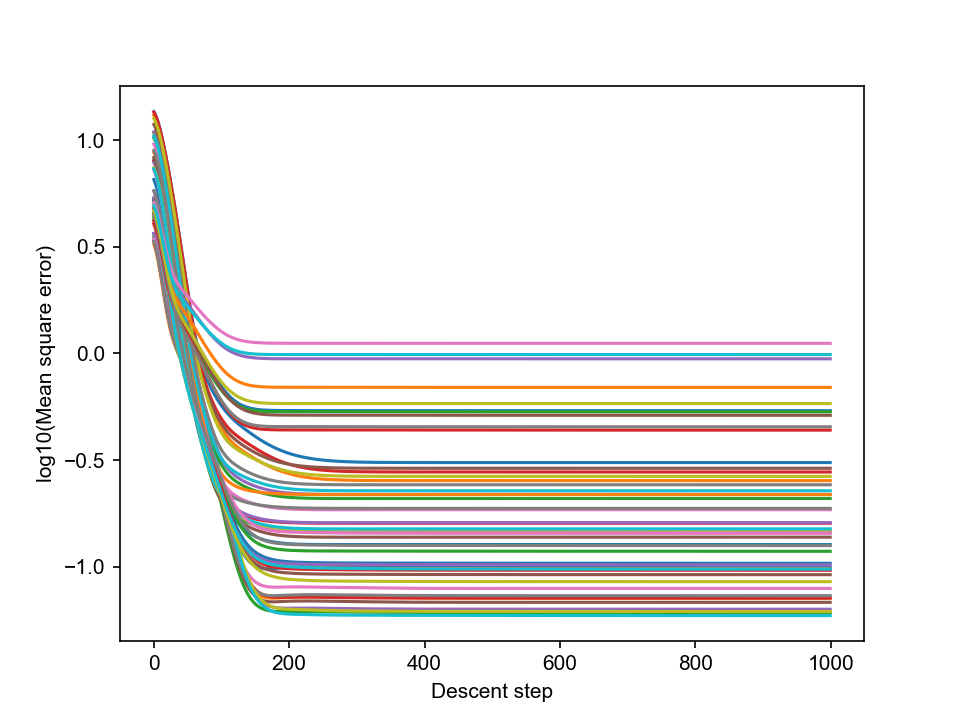

In [10]:
iq6 = ImageQuant2(
    img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het,
    roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het,
    cytbg=cytbg,
)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

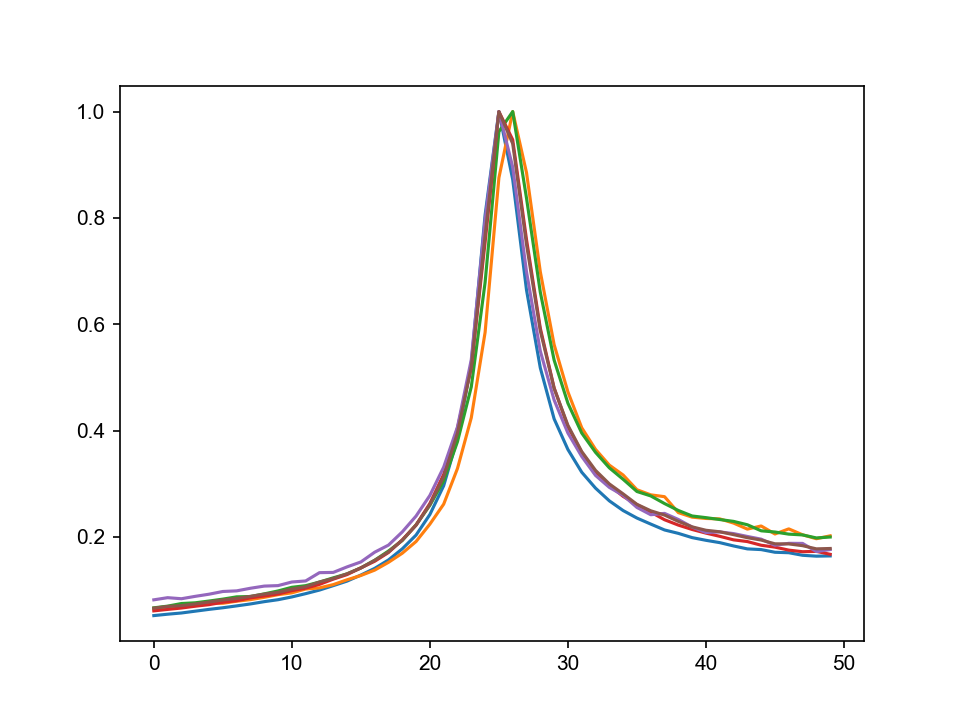

In [11]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [12]:
# Save
np.savetxt("../../data/calibration_mem1.txt", iq1.membg)
np.savetxt("../../data/calibration_mem2.txt", iq2.membg)
np.savetxt("../../data/calibration_mem3.txt", iq3.membg)
np.savetxt("../../data/calibration_mem4.txt", iq4.membg)
np.savetxt("../../data/calibration_mem5.txt", iq5.membg)
np.savetxt("../../data/calibration_mem6.txt", iq6.membg)